In [2]:
'''!wget https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/train_set.csv.zip
!unzip train_set.csv.zip
!wget https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/test_a.csv.zip
!unzip test_a.csv.zip'''

'!wget https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/train_set.csv.zip\n!unzip train_set.csv.zip\n!wget https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/test_a.csv.zip\n!unzip test_a.csv.zip'

In [3]:
import pandas as pd
sub_1 = pd.read_csv('test_a_sample_submit.csv')
train_df = pd.read_csv('train_set.csv',sep='\t')
test_df  =  pd.read_csv('test_a.csv',sep='\t')

In [5]:
print(train_df.shape)
print(test_df.shape)

(200000, 2)
(50000, 1)


### 赛题分析
#### 1.数据
赛题数据为新闻文本，并按照**字符级别进行匿名处理**。整合划分出14个候选分类类别：财经、彩票、房产、股票、家居、教育、科技、社会、时尚、时政、体育、星座、游戏、娱乐的文本数据。
赛题数据由以下几个部分构成：训练集20w条样本，测试集A包括5w条样本，测试集B包括5w条样本。

#### 2.指标
评价标准为类别f1_score的均值，选手提交结果与实际测试集的类别进行对比，结果越大越好。

计算公式：
$$F1 = 2 * \frac{(precision * recall) }{(precision + recall)}$$

#### 3.赛题思路分析
赛题本质是一个文本分类问题，需要根据每句的字符进行分类。但赛题给出的数据是匿名化的，**不能直接使用中文分词等操作**，这个是赛题的难点。

因此本次赛题的难点是需要**对匿名字符进行建模**，进而完成文本分类的过程。由于文本数据是一种典型的非结构化数据，因此可能涉及到特征提取和分类模型两个部分。为了减低参赛难度，我们提供了一些解题思路供大家参考：

**思路1**：TF-IDF + 机器学习分类器
直接使用TF-IDF对文本提取特征，并使用分类器进行分类。在分类器的选择上，可以使用SVM、LR、或者XGBoost。

**思路2**：FastText
FastText是入门款的词向量，利用Facebook提供的FastText工具，可以快速构建出分类器。

**思路3**：WordVec + 深度学习分类器
WordVec是进阶款的词向量，并通过构建深度学习分类完成分类。深度学习分类的网络结构可以选择TextCNN、TextRNN或者BiLSTM。

**思路4**：Bert词向量
Bert是高配款的词向量，具有强大的建模学习能力。

​	



### 基础数据分析
在读取完成数据集后，我们还可以对数据集进行数据分析的操作。虽然对于非结构数据并不需要做很多的数据分析，但通过数据分析还是可以找出一些规律的。

从类似如下问题找到一些支撑后续数据分析的依据
- 赛题数据中，新闻文本的长度是多少？
- 赛题数据的类别分布是怎么样的，哪些类别比较多？
- 赛题数据中，字符分布是怎么样的？





#### 1.文本长度分析
我们先来看看训练集和测试集每个句子的长度

对新闻句子的统计可以得出，本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。

测试集与训练集类似，只不过测试集上最小的文本长度是14.而训练集上是2.但是训练集上2-13的样本仅有15个


大部分句子的长度都集中在2000以内。

In [6]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print('训练集文本长度统计信息：',train_df['text_len'].describe())

训练集文本长度统计信息： count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Train-set Histogram of char count')

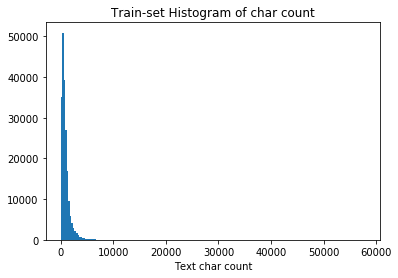

In [7]:
import matplotlib.pyplot  as plt 
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Train-set Histogram of char count")

In [8]:
test_df['text_len'] = test_df['text'].apply(lambda x: len(x.split(' ')))
print('测试集文本长度统计信息：',test_df['text_len'].describe())

测试集文本长度统计信息： count    50000.000000
mean       909.844960
std       1032.313375
min         14.000000
25%        370.000000
50%        676.000000
75%       1133.000000
max      41861.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Test-set Histogram of char count')

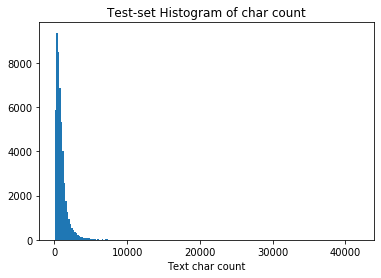

In [9]:
_ = plt.hist(test_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Test-set Histogram of char count")

In [10]:
train_df[train_df['text_len']<14].shape[0]


15

#### 2.新闻类别分布

接下来可以对数据集的类别进行分布统计，具体统计每类新闻的样本个数。

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

Text(0.5, 0, 'category')

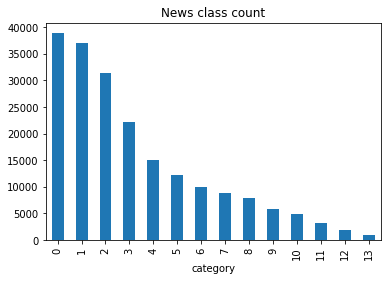

In [11]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

#### 3.字符分布统计
接下来可以统计每个字符出现的次数，首先可以将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数。

**由于实在是太慢了，这里采样分析20000条**

In [12]:
train_df['smp_weights']=train_df.label.apply(lambda x:x+1)
train_sample=train_df.sample(n=20000,weights='smp_weights',random_state=43)

Text(0.5, 0, 'category')

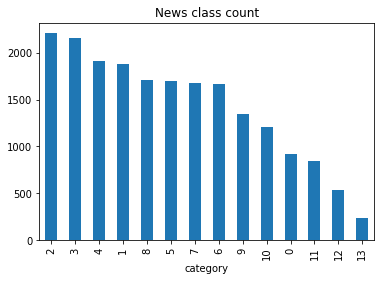

In [13]:
train_sample['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

In [14]:
from collections import Counter
all_lines = ' '.join(list(train_sample['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))
# 6869
print(word_count[0])
# ('3750', 7482224)

print(word_count[-1])
# ('3133', 1)


5775
('3750', 775036)
('4710', 1)


从统计结果中可以看出，在训练集中总共包括5775个字，其中编号3750的字出现的次数最多。

这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在2w新闻的覆盖率接近99%，很有可能是标点符号。

In [15]:
train_sample['text_unique'] = train_sample['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_sample['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])
print(word_count[1])
print(word_count[2])


('3750', 19755)
('900', 19675)
('648', 19244)


#### 4.文章平均句子长度统计
如果将3750、900、648当作标点符号，训练集的平均句子长度是80.8；测试集的平均句子长度是81.1；

这个长度似乎在中文中属于比较长的长度；一般25字以上的就是复杂句了。因此，可能并不只是有这三个标点；或者这三个并不全是标点。具体的待后面分析。

In [16]:
import re
train_df['text_sent_cnt']=train_df['text'].apply(lambda x : len(re.split('3750|900|648',x)))
test_df['text_sent_cnt']=test_df['text'].apply(lambda x : len(re.split('3750|900|648',x)))

In [17]:
print('训练集句子长度统计：',train_df['text_sent_cnt'].describe())

训练集句子长度统计： count    200000.000000
mean         80.802370
std          86.955448
min           1.000000
25%          29.000000
50%          57.000000
75%         103.000000
max        3460.000000
Name: text_sent_cnt, dtype: float64


In [18]:
print('测试集句子长度统计：',test_df['text_sent_cnt'].describe())

测试集句子长度统计： count    50000.000000
mean        81.061160
std         88.328573
min          1.000000
25%         29.000000
50%         57.000000
75%        104.000000
max       2856.000000
Name: text_sent_cnt, dtype: float64


#### 5.统计每类新闻中出现次数最多的字符

**--也是用的样本数据**


In [19]:
train_sample=train_sample.reset_index(drop=True)

In [20]:
from collections import  defaultdict
class_text_dict=defaultdict(str)

for i in range(train_sample.shape[0]):
    class_text_dict[train_sample.loc[i]['label']]+=train_sample.loc[i]['text']+' '


In [38]:
from collections import Counter
class_text_count = {}
for key in class_text_dict:
    class_count = Counter(class_text_dict[key].split(' '))
    class_count = sorted(class_count.items(),key=lambda w:w[1],reverse=True)
    class_text_count[key] = class_count[:10]   


In [39]:
class_word_top10_df = pd.DataFrame(class_text_count)
class_word_top10_df 

,6,0,2,7,8,4,5,3,12,10,1,9,13,11
0,"(3750, 80967)","(3750, 28173)","(3750, 104241)","(3750, 79684)","(3750, 55894)","(3750, 45186)","(3750, 101924)","(3750, 74228)","(3750, 26109)","(3750, 44998)","(3750, 59851)","(3750, 44012)","(3750, 8633)","(3750, 21136)"
1,"(648, 60097)","(648, 21557)","(648, 69644)","(648, 47756)","(648, 46268)","(648, 28651)","(648, 46196)","(648, 47502)","(4464, 15645)","(648, 29123)","(648, 35598)","(648, 38286)","(648, 6817)","(648, 17444)"
2,"(900, 38029)","(900, 12896)","(900, 44240)","(900, 34308)","(900, 21074)","(900, 24059)","(900, 43226)","(900, 28898)","(3370, 13234)","(900, 18855)","(3370, 29800)","(900, 17142)","(900, 2994)","(900, 9677)"
3,"(6248, 31933)","(3370, 10795)","(1633, 37167)","(3370, 29351)","(6122, 13709)","(4411, 14710)","(6122, 22633)","(6122, 18151)","(648, 10969)","(3370, 16816)","(900, 27130)","(7328, 11377)","(4939, 2386)","(5560, 4760)"
4,"(2555, 29990)","(4464, 6665)","(7399, 25186)","(5296, 23088)","(4939, 13363)","(7399, 10941)","(5598, 19358)","(4939, 16785)","(900, 10720)","(2465, 11405)","(4464, 20844)","(6122, 10604)","(669, 2320)","(4939, 4730)"
5,"(5620, 26494)","(2465, 6180)","(6122, 24083)","(4464, 20516)","(913, 12181)","(4893, 9479)","(4893, 18502)","(669, 14215)","(3659, 10305)","(3686, 10564)","(3659, 18607)","(5547, 9346)","(6122, 2046)","(6122, 4581)"
6,"(2465, 22398)","(6122, 6120)","(4939, 23920)","(6835, 18565)","(5560, 11654)","(6122, 9154)","(7399, 17224)","(7399, 14148)","(2465, 10133)","(5560, 10294)","(5036, 15108)","(7399, 9299)","(4893, 1963)","(669, 4406)"
7,"(6122, 20525)","(7399, 5905)","(4704, 21896)","(3659, 15368)","(7399, 10332)","(4464, 8912)","(3370, 14443)","(4893, 13967)","(6065, 8861)","(4464, 10056)","(6250, 14025)","(4939, 9239)","(4811, 1627)","(4811, 3729)"
8,"(5560, 18984)","(3659, 5537)","(1667, 21542)","(6122, 13581)","(4811, 9400)","(2400, 8583)","(4939, 14443)","(803, 13520)","(1667, 6538)","(3523, 9268)","(2465, 11308)","(3370, 8399)","(3864, 1544)","(7539, 3262)"
9,"(4939, 17092)","(4939, 5377)","(5598, 20613)","(7399, 13155)","(3961, 9204)","(4853, 8319)","(803, 13685)","(1635, 13499)","(2614, 6417)","(6122, 8808)","(6357, 10963)","(4811, 7273)","(3800, 1470)","(4893, 3142)"


#### 6.统计每类新闻中最常见的3元字符对

大部分的三元对在每个新闻类别中是不一样的

In [22]:
from nltk.util import ngrams

In [26]:
class_trigrams = {}
for key in class_text_dict:
    text_trigrams = [i for i in ngrams(class_text_dict[key].split(' '),3)]
    class_trigrams[key] = Counter(text_trigrams).most_common(10)   

In [40]:
class_trigrams_top10_df = pd.DataFrame(class_trigrams)
class_trigrams_top10_df 

,6,0,2,7,8,4,5,3,12,10,1,9,13,11
0,"((1633, 1633, 1633), 3709)","((1633, 1633, 1633), 974)","((1633, 1633, 1633), 31193)","((3659, 3370, 3370), 3051)","((2087, 730, 6045), 2288)","((3530, 6508, 3750), 1172)","((3659, 3370, 3370), 2040)","((7495, 2435, 1168), 1243)","((314, 4261, 1667), 770)","((3659, 3370, 3370), 1557)","((1633, 1633, 1633), 4123)","((1633, 1633, 1633), 1488)","((5491, 1580, 2662), 206)","((2899, 1315, 7539), 399)"
1,"((3659, 3370, 3370), 1932)","((3659, 3370, 3370), 894)","((1633, 1633, 2465), 2292)","((5296, 151, 2859), 1900)","((1633, 1633, 1633), 1226)","((1702, 3300, 3750), 1170)","((3370, 3370, 2106), 901)","((2435, 1168, 5718), 1243)","((2465, 6065, 6250), 630)","((3370, 3370, 3370), 1546)","((3659, 3370, 3370), 2556)","((648, 7328, 5547), 1076)","((6038, 4231, 648), 192)","((6811, 1580, 7539), 310)"
2,"((3659, 3370, 4464), 1805)","((5562, 2828, 4559), 555)","((2614, 4269, 4704), 2159)","((6835, 5296, 151), 1884)","((3750, 1985, 7194), 1081)","((3659, 3370, 3370), 1142)","((7058, 6045, 2465), 900)","((1168, 5718, 134), 1149)","((2614, 4269, 4704), 561)","((3523, 3686, 3374), 1513)","((3370, 3370, 3370), 1602)","((3659, 3370, 4464), 801)","((1264, 2827, 3070), 129)","((900, 6811, 1580), 240)"
3,"((2465, 3560, 1258), 1315)","((1702, 3300, 3750), 513)","((6004, 5718, 2986), 1867)","((5096, 2539, 6045), 1870)","((3659, 3370, 3370), 992)","((1518, 1219, 3743), 852)","((3750, 1465, 7194), 890)","((5718, 134, 2465), 1122)","((1633, 1633, 1633), 537)","((1633, 1633, 1633), 1475)","((3659, 3370, 4464), 1584)","((3659, 3370, 3370), 789)","((648, 5445, 1323), 117)","((5491, 6811, 1580), 222)"
4,"((648, 2555, 5620), 1266)","((3370, 3370, 3370), 512)","((3659, 3370, 3370), 1745)","((2465, 2465, 2465), 1832)","((3659, 3370, 4464), 829)","((4853, 1407, 2465), 735)","((3750, 7058, 6045), 850)","((5028, 7539, 803), 1111)","((4499, 4641, 7539), 471)","((5176, 2252, 4562), 1453)","((5096, 2539, 6045), 1535)","((7328, 5547, 3750), 743)","((6822, 3800, 2642), 112)","((6811, 1580, 2662), 221)"
5,"((3648, 5370, 5620), 1261)","((3659, 3370, 4464), 400)","((648, 4269, 4704), 1695)","((3659, 3370, 4464), 1417)","((6206, 7261, 2282), 717)","((4173, 3366, 6133), 577)","((1702, 3300, 3750), 832)","((3659, 3370, 3370), 943)","((3370, 3370, 6242), 464)","((486, 5858, 6352), 1379)","((3370, 3370, 3700), 1314)","((7328, 5547, 648), 727)","((3750, 3618, 4939), 104)","((6038, 4231, 648), 198)"
6,"((3560, 1258, 2119), 1139)","((2087, 730, 6045), 373)","((7495, 2435, 5510), 1660)","((3370, 3370, 3370), 1417)","((648, 3374, 3893), 659)","((3750, 1141, 4411), 550)","((6038, 4231, 648), 829)","((6038, 4231, 648), 922)","((5330, 4704, 2621), 444)","((1633, 1633, 2465), 1168)","((1702, 3300, 3750), 1197)","((7328, 5547, 2400), 672)","((531, 1102, 3070), 98)","((2021, 5620, 1919), 178)"
7,"((6038, 4231, 648), 1056)","((3370, 3370, 6242), 352)","((2435, 5510, 296), 1660)","((1702, 3300, 3750), 1365)","((1146, 4180, 5271), 572)","((7495, 1348, 4559), 550)","((3370, 3370, 3370), 825)","((5491, 1580, 2662), 759)","((5006, 4464, 486), 437)","((3370, 3370, 2106), 1122)","((4230, 1141, 2106), 1082)","((3750, 4768, 913), 587)","((36, 3073, 5367), 94)","((3750, 5612, 5948), 169)"
8,"((3370, 4464, 3370), 1009)","((4464, 3370, 3370), 349)","((5510, 296, 134), 1490)","((4298, 6835, 5296), 1330)","((3370, 4464, 3370), 558)","((6861, 6654, 1362), 505)","((1247, 2376, 5612), 754)","((1702, 3300, 3750), 654)","((2465, 4499, 4641), 423)","((2106, 4046, 486), 1084)","((3370, 3370, 6104), 911)","((4559, 3464, 7328), 579)","((3073, 5367, 5537), 94)","((3750, 1375, 5948), 164)"
9,"((1258, 2119, 2465), 967)","((1018, 1066, 2119), 340)","((4269, 4704, 3750), 1459)","((2106, 4046, 2484), 1231)","((3750, 3618, 4939), 525)","((7023, 5566, 3800), 490)","((900, 3659, 3370), 691)","((3750, 5612, 5948), 628)","((3659, 3370, 3370), 390)","((2729, 5192, 1920), 970)","((3370, 4464, 3370), 892)","((3464, 7328, 5547), 578)","((3019, 3607, 7539), 93)","((648, 6206, 7261), 154)"


#### 总结
数据分析利于我们发现一些规律，对特征工程部份有利。

- 1.类别不均衡问题需要克服
- 2.新闻文本的长度 长尾
- 3.每类新闻中最常见的字符和三元对是不一样的，能够作为有区分度的特征。但是需要先去除停用词。
- 4.由于字符加密，可能不能使用预训练模型，需要使用可训练的词向量模型。